# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle, os
from IPython.display import clear_output

In [2]:
from tqdm.auto import tqdm, trange
tqdm.pandas()

D:\Users\Ritvik\Anaconda3\envs\datascience\lib\site-packages\tqdm\std.py:648: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
pd.options.display.max_colwidth = -1

from dsutils import *

# Data

In [4]:
data = pd.read_csv('data.csv')

# Vectorizisation

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [6]:
vectorizer = TfidfVectorizer(smooth_idf=True)
vector = vectorizer.fit_transform(data['Text'].astype(str))

y=data['Spam'].astype('int').values

In [7]:
print('X shape', vector.shape)
print('Y shape', y.shape)

X shape (14868, 52636)
Y shape (14868,)


# Machine Learning

In [8]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier, BaggingClassifier, RandomForestClassifier

## Multinomial NB

Mean Loss 0.9145821434939506 +- 0.004942928935026586


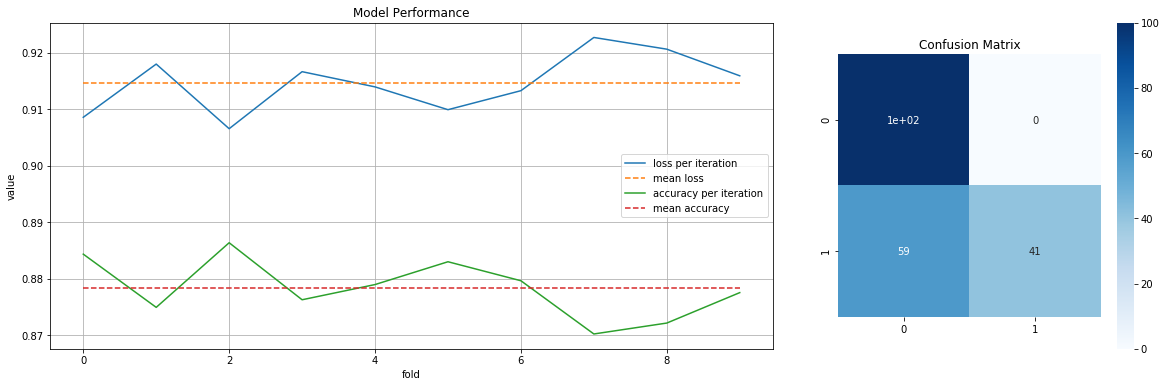

In [9]:
model = MultinomialNB()
mnb_performance, mnb_cm, mnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(mnb_performance['loss']), '+-', np.std(mnb_performance['loss']))

## Bernoulli NB

Mean Loss 0.907587245585564 +- 0.004925739412634346


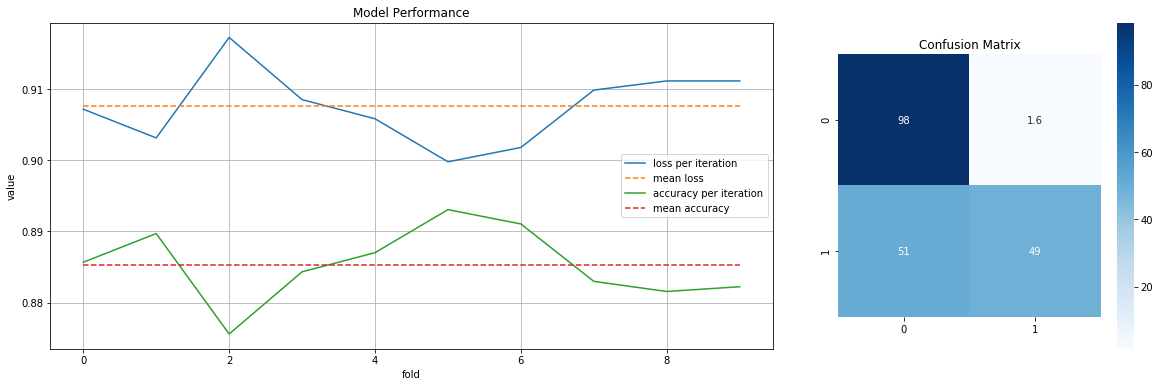

In [10]:
model = BernoulliNB()
bnb_performance, bnb_cm, bnb_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(bnb_performance['loss']), '+-', np.std(bnb_performance['loss']))

## Logistic Regression

Mean Loss 0.8459783805995613 +- 0.00582018740732589


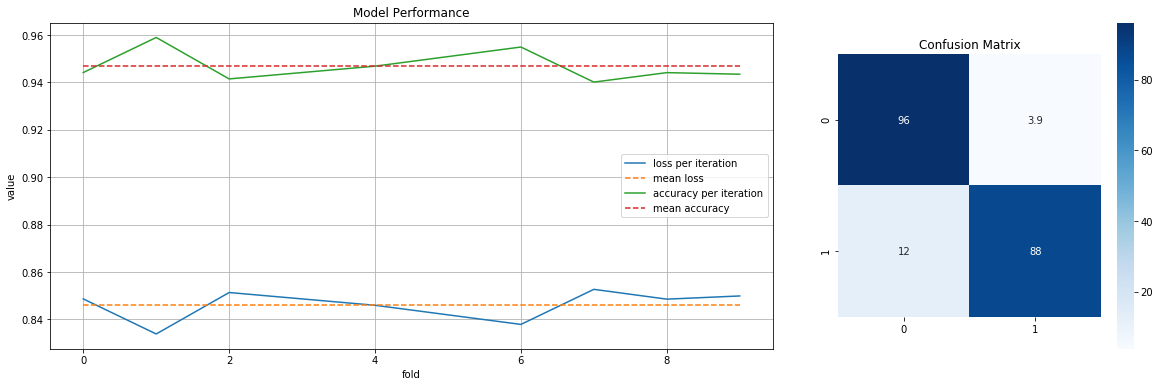

In [11]:
model = LogisticRegression(solver='liblinear', penalty='l1', max_iter=1000, class_weight='balanced', random_state=101, 
                           warm_start=True)
lr1_performance, lr1_cm, lr1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr1_performance['loss']), '+-', np.std(lr1_performance['loss']))

Mean Loss 0.834880856159393 +- 0.0043080137301279


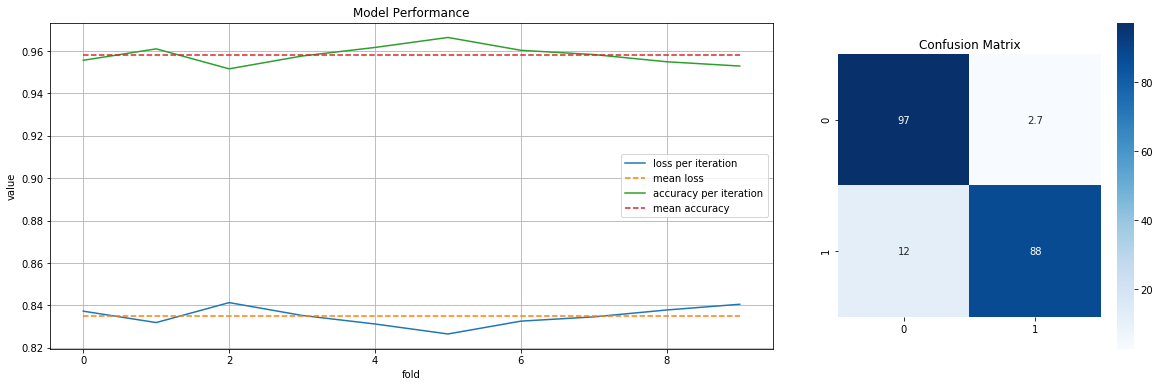

In [12]:
model = LogisticRegression(solver='lbfgs', max_iter=1000, class_weight='balanced', random_state=101, warm_start=True)
lr2_performance, lr2_cm, lr2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(lr2_performance['loss']), '+-', np.std(lr2_performance['loss']))

## SGD Classifier - log loss

Mean Loss 0.8478617285202124 +- 0.005594115897137844


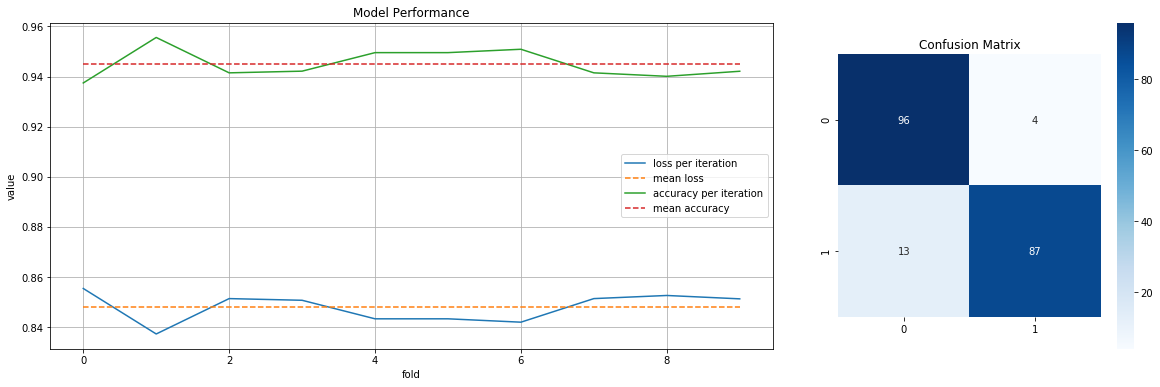

In [13]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True,
                      class_weight='balanced')
sgdl1_performance, sgdl1_cm, sgdl1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl1_performance['loss']), '+-', np.std(sgdl1_performance['loss']))

Mean Loss 0.8352172846590594 +- 0.004692728711255161


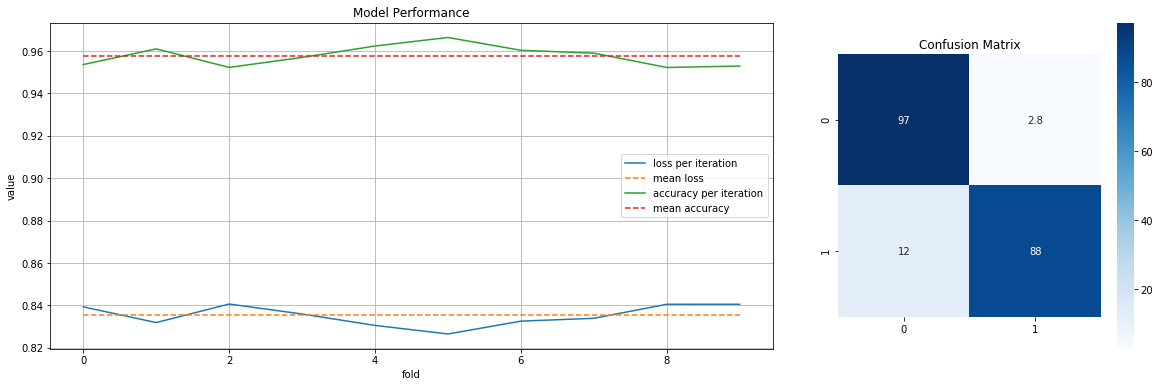

In [14]:
model = SGDClassifier(loss='log', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdl2_performance, sgdl2_cm, sgdl2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdl2_performance['loss']), '+-', np.std(sgdl2_performance['loss']))

## SGD Classifier - hinge loss

Mean Loss 0.8409335370428866 +- 0.00669312360329376


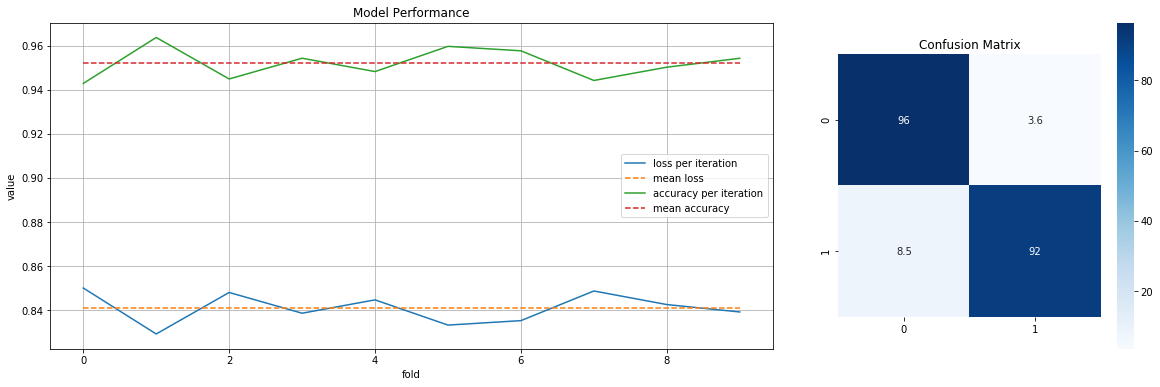

In [15]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdh1_performance, sgdh1_cm, sgdh1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh1_performance['loss']), '+-', np.std(sgdh1_performance['loss']))

Mean Loss 0.829903397864489 +- 0.004476194431697938


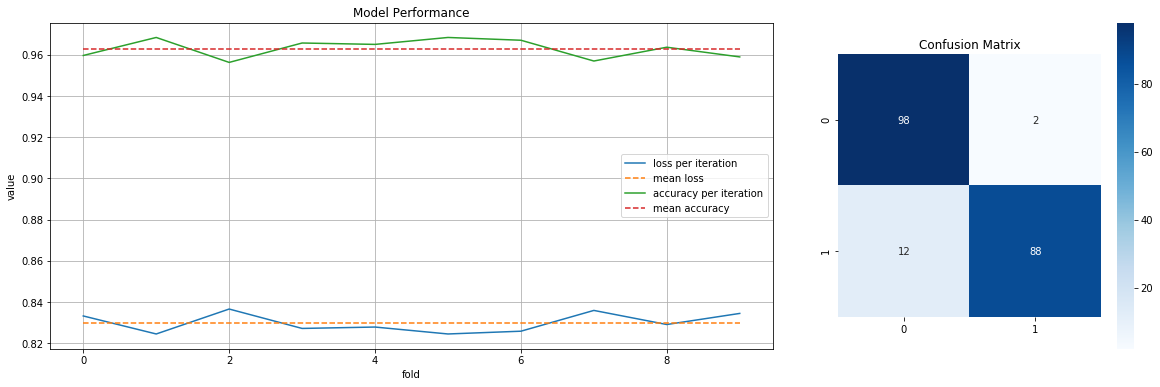

In [16]:
model = SGDClassifier(loss='hinge', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdh2_performance, sgdh2_cm, sgdh2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdh2_performance['loss']), '+-', np.std(sgdh2_performance['loss']))

## SGD Classifier - perceptron loss

Mean Loss 0.9506926788560526 +- 0.09944088109298137


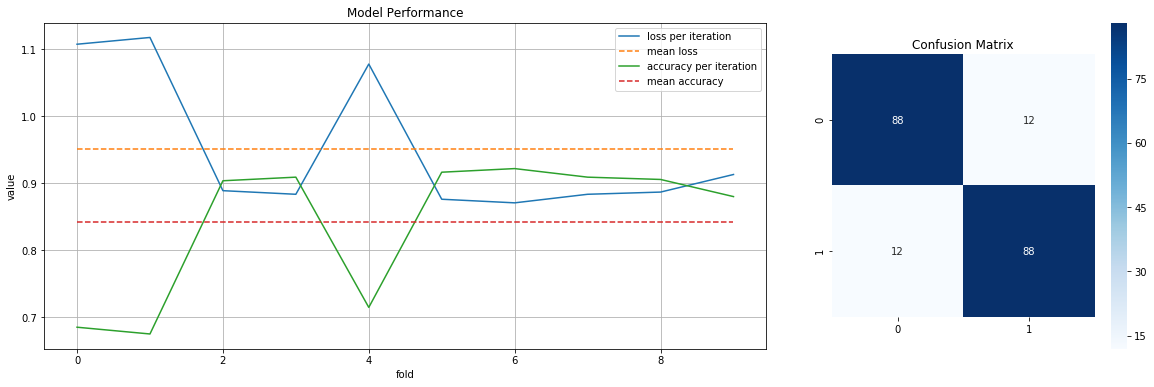

In [17]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdp1_performance, sgdp1_cm, sgdp1_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp1_performance['loss']), '+-', np.std(sgdp1_performance['loss']))

Mean Loss 0.8414718045402008 +- 0.005842857009613185


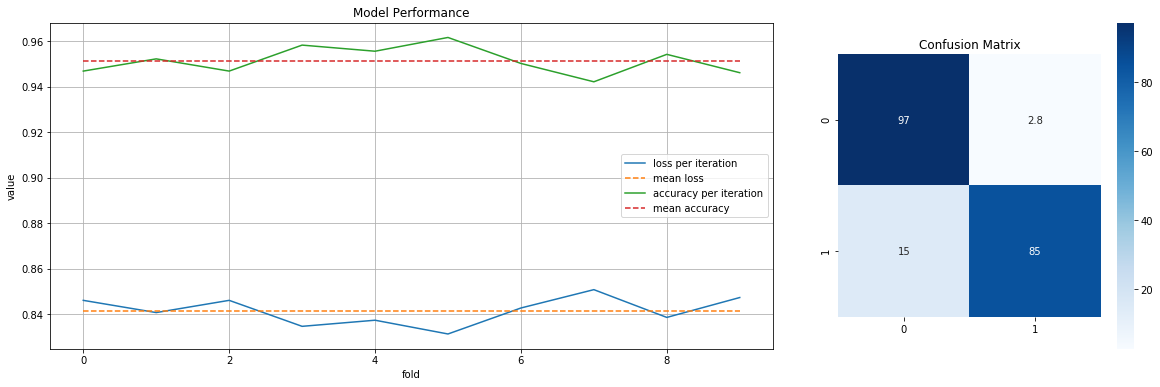

In [18]:
model = SGDClassifier(loss='perceptron', max_iter=1000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                      class_weight='balanced')
sgdp2_performance, sgdp2_cm, sgdp2_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(sgdp2_performance['loss']), '+-', np.std(sgdp2_performance['loss']))

## Decision Tree

Mean Loss 0.8626582920076282 +- 0.005987588933937202


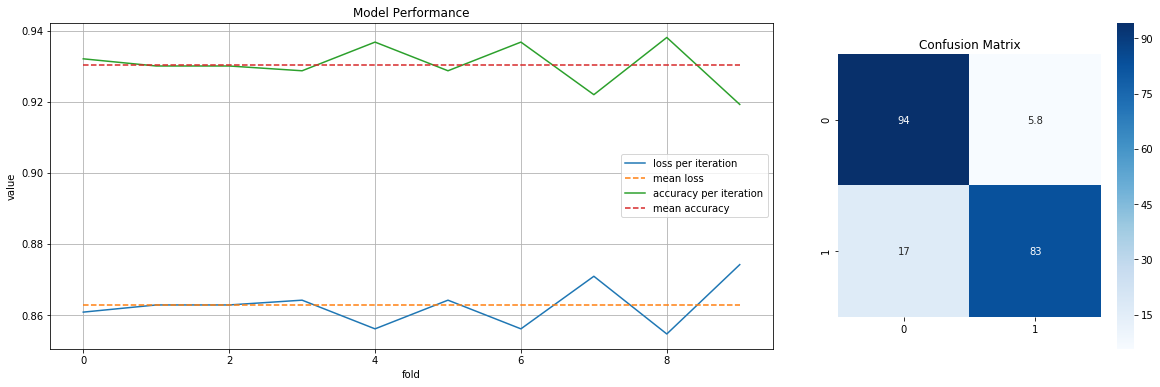

In [19]:
model = DecisionTreeClassifier(class_weight='balanced', random_state=101)
dt_performance, dt_cm, dt_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(dt_performance['loss']), '+-', np.std(dt_performance['loss']))

In [20]:
cm = [
    mnb_cm, bnb_cm, lr1_cm, lr2_cm, sgdl1_cm, sgdl2_cm, sgdh1_cm, sgdh2_cm, sgdp1_cm, sgdp2_cm, dt_cm
]

model = [
    'MultinomialNB', 'BernoulliNB', 'LogisticRegression1', 'LogisticRegression2', 'SGDClassifierL1', 'SGDClassifierL2',
    'SGDClassifierH1', 'SGDClassifierH2', 'SGDClassifierP1', 'SGDClassifierP2', 'DecisionTreeClassifier'
]

performance = pd.DataFrame({
    'FP': [x[0][1] for x in cm],
    'FN': [x[1][0] for x in cm]
}, index=model)

In [21]:
performance

,FP,FN
MultinomialNB,0.000000,59.283388
BernoulliNB,1.611535,50.814332
LogisticRegression1,3.901612,12.377850
LogisticRegression2,2.714165,12.377850
SGDClassifierL1,3.986429,12.703583
SGDClassifierL2,2.798982,12.052117
SGDClassifierH1,3.562341,8.469055
SGDClassifierH2,1.950806,12.377850
SGDClassifierP1,11.959288,12.052117
SGDClassifierP2,2.798982,15.309446


Mean Loss 0.8350151288737475 +- 0.004628397676540351


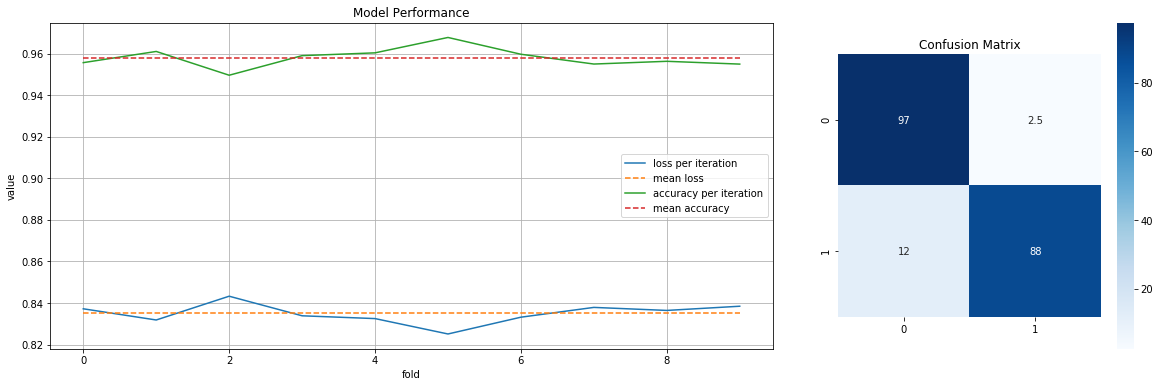

In [22]:
model = VotingClassifier(estimators=[
    ('SGD-H2', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('LR-2', LogisticRegression(solver='lbfgs', max_iter=100000, class_weight='balanced', random_state=101, warm_start=True)),
    ('SGD-H1', SGDClassifier(loss='hinge', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-P2', SGDClassifier(loss='perceptron', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True,
                             class_weight='balanced', early_stopping=True)),
    ('SGD-L2', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l2', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('SGD-L1', SGDClassifier(loss='log', max_iter=100000, tol=0.001, penalty='l1', random_state=101, warm_start=True, 
                             class_weight='balanced', early_stopping=True)),
    ('LR-1', LogisticRegression(solver='liblinear', max_iter=100000, class_weight='balanced', random_state=101, 
                                warm_start=True))
    
])
v_performance, v_cm, v_model = train_model_on_vects(model, vector, y)
print('Mean Loss', np.mean(v_performance['loss']), '+-', np.std(v_performance['loss']))

In [23]:
pickle.dump(vectorizer, open('Vectorizer-spam-1.pkl', 'wb'))

In [24]:
pickle.dump(v_model, open('SpamClassifier-1.pkl', 'wb'))